In [4]:
import numpy as np
import pandas as pd

In [6]:
ds=pd.read_csv("moviereviews.csv")
ds.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [8]:
ds.isnull().sum()

label      0
review    35
dtype: int64

In [10]:
ds.shape

(2000, 2)

In [12]:
ds.dropna(inplace=True)

In [14]:
ds["label"].value_counts()

label
neg    983
pos    982
Name: count, dtype: int64

In [16]:
ds["review"].str.isspace().sum()

27

In [18]:
ds=ds[~ds["review"].str.isspace()]

In [20]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


#### EDA on Bag of Words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words="english")

In [ ]:
smat_neg=cv.fit_transform(ds[ds["label"]=="neg"]["review"])
freq_n=zip(cv.get_feature_names_out(),smat_neg.sum(axis=0).tolist()[0])
print("Top 20 words used for Negative reviews:")
print(sorted(freq_n,key=lambda x:-x[1])[:20])

In [ ]:
smat_pos=cv.fit_transform(ds[ds["label"]=="pos"]["review"])
freq_p=zip(cv.get_feature_names_out(),smat_pos.sum(axis=0).tolist()[0])
print("Top 20 words used for Positive reviews:")
print(sorted(freq_p,key=lambda x:-x[1])[:20])

#### Features and Label

In [24]:
data=ds[["label","review"]]
x=ds["review"]
y=ds["label"]

#### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
data.shape

(1938, 2)

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

#### Vectorization

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words="english")
tfidf.fit(x_train)

TfidfVectorizer(stop_words='english')

In [107]:
x_train_tfidf=tfidf.transform(x_train)
x_test_tfidf=tfidf.transform(x_test)

#### Model Comparison

In [109]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train_tfidf,y_train)

MultinomialNB()

In [111]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)
log.fit(x_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [113]:
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc.fit(x_train_tfidf,y_train)

LinearSVC()

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_tfidf,y_train)

RandomForestClassifier()

#### Performance Evaluation

In [117]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [119]:
def report(model):
    print("Model is:",model)
    y_pred=model.predict(x_test_tfidf)
    print(classification_report(y_pred,y_test))
    cm=confusion_matrix(y_pred,y_test)
    display=ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()

Model is: MultinomialNB()
              precision    recall  f1-score   support

         neg       0.87      0.78      0.82       214
         pos       0.76      0.86      0.80       174

    accuracy                           0.81       388
   macro avg       0.81      0.82      0.81       388
weighted avg       0.82      0.81      0.81       388



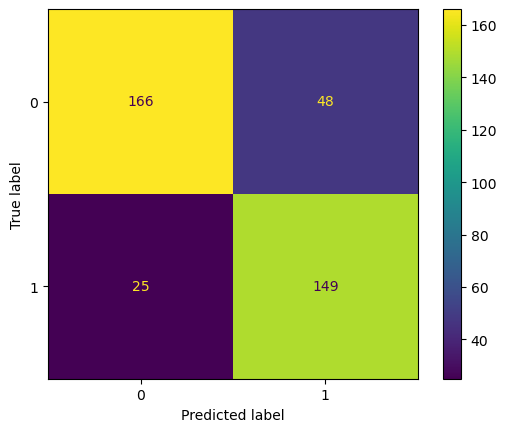

In [121]:
report(nb)

Model is: LogisticRegression(max_iter=1000)
              precision    recall  f1-score   support

         neg       0.85      0.80      0.83       204
         pos       0.79      0.85      0.82       184

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



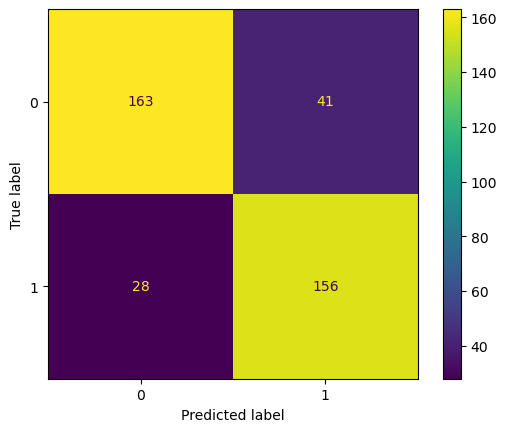

In [123]:
report(log)

Model is: LinearSVC()
              precision    recall  f1-score   support

         neg       0.84      0.81      0.82       197
         pos       0.81      0.84      0.82       191

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



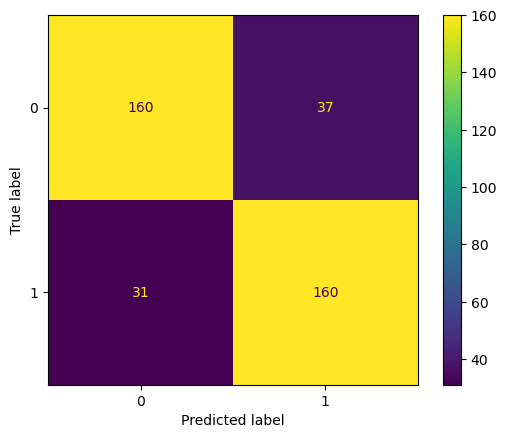

In [125]:
report(svc)

Model is: RandomForestClassifier()
              precision    recall  f1-score   support

         neg       0.90      0.74      0.81       231
         pos       0.70      0.87      0.77       157

    accuracy                           0.79       388
   macro avg       0.80      0.81      0.79       388
weighted avg       0.81      0.79      0.80       388



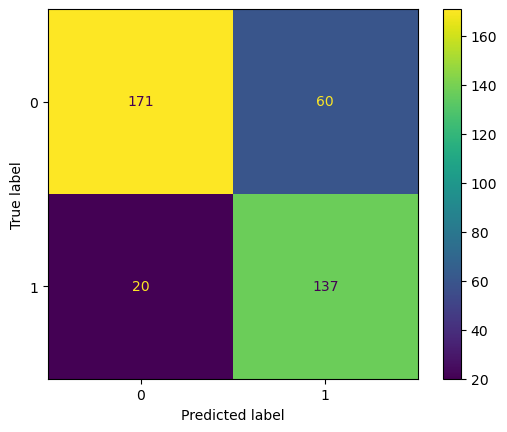

In [127]:
report(rfc)

#### Pipeline

In [133]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([("tfidf",TfidfVectorizer(stop_words="english")),("rfc",RandomForestClassifier(n_estimators=100))])
pipe.fit(ds["review"],ds["label"])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier())])

In [134]:
new_review=["This movie is a masterpiece","The actor could have done more","the scenes were beautiful and the meaning was deep"]
pipe.predict(new_review)

array(['pos', 'pos', 'pos'], dtype=object)

In [143]:
review1=["This movie is good but could have been better","this movie is good"]
pipe.predict(review1)

array(['neg', 'pos'], dtype=object)